## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv and Rose.csv

**Please do perform the following questions on each of these two data sets separately.**

In [1]:
# import important libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pylab import rcParams
from statsmodels.graphics.tsaplots import month_plot # Plot time series month plot
from statsmodels.distributions.empirical_distribution import ECDF # plot Empirical cumulative distriburtion
from statsmodels.tsa.seasonal import seasonal_decompose #Decompose Timeseries
from statsmodels.tsa.stattools import adfuller # Augmented Dickey fuller test for stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Auto correlation & partial auto correlation plot
from statsmodels.tsa.arima_model import ARIMA # Arima model
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
os.chdir('D:\E_Backup\Data science & Business analytics_Great learning\Module_7_Time Series Forecasting\Week_4')

**1. Read the data as an appropriate Time Series data and plot the data.**

In [3]:
df = pd.read_csv('Rose.csv')
df.head() # first 5 rows

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
df.tail() # last 5 rows

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [5]:
#information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [6]:
# check for missing values
df.isnull().values.any()

True

In [7]:
df.isna().sum()

YearMonth    0
Rose         2
dtype: int64

Dataset has missing values. These values has to be imputed.

In [8]:
# Create time stamp and add it to Data frame to make it time series dataframe
date = pd.date_range(start = '01/01/1980', end = '08/01/1995', freq = 'M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [9]:
df['Time_stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Rose,Time_stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [10]:
df.tail()

,YearMonth,Rose,Time_stamp
182,1995-03,45.0,1995-03-31
183,1995-04,52.0,1995-04-30
184,1995-05,28.0,1995-05-31
185,1995-06,40.0,1995-06-30
186,1995-07,62.0,1995-07-31


In [11]:
df.set_index('Time_stamp', inplace = True)
df.drop('YearMonth', axis = 1 , inplace = True)
df.head()

,Rose
Time_stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [12]:
#Plot the time series to understand the behaviour of data
rcParams['figure.figsize'] = 20,8

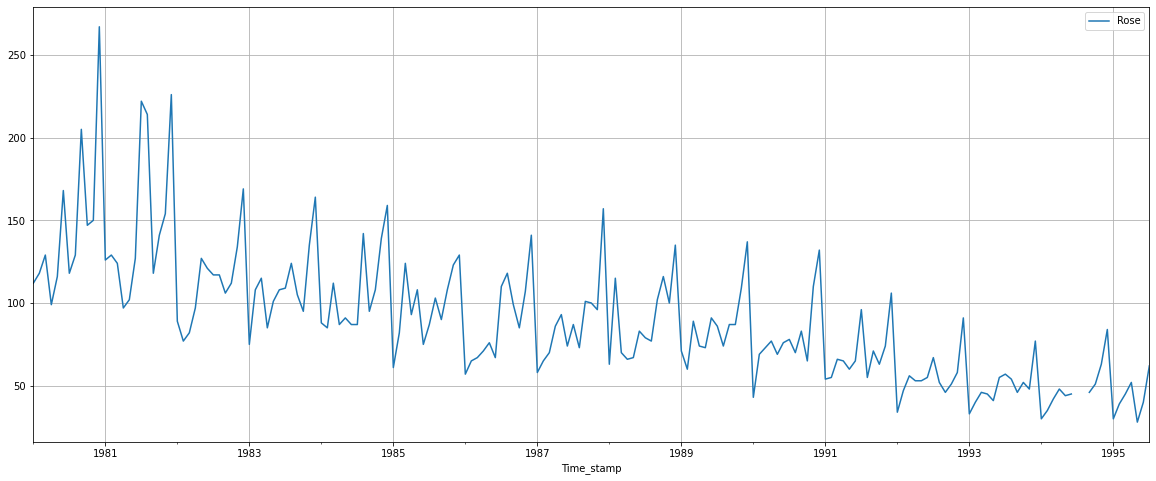

In [13]:
df.plot(grid = True);

* Data has decreasing trend and Seasonality.
* Data has missing values in the year 1994, Same is observed in the plot.

July and August of 1994 has missing values.

In [14]:
df = df.interpolate(method='spline',order=1)

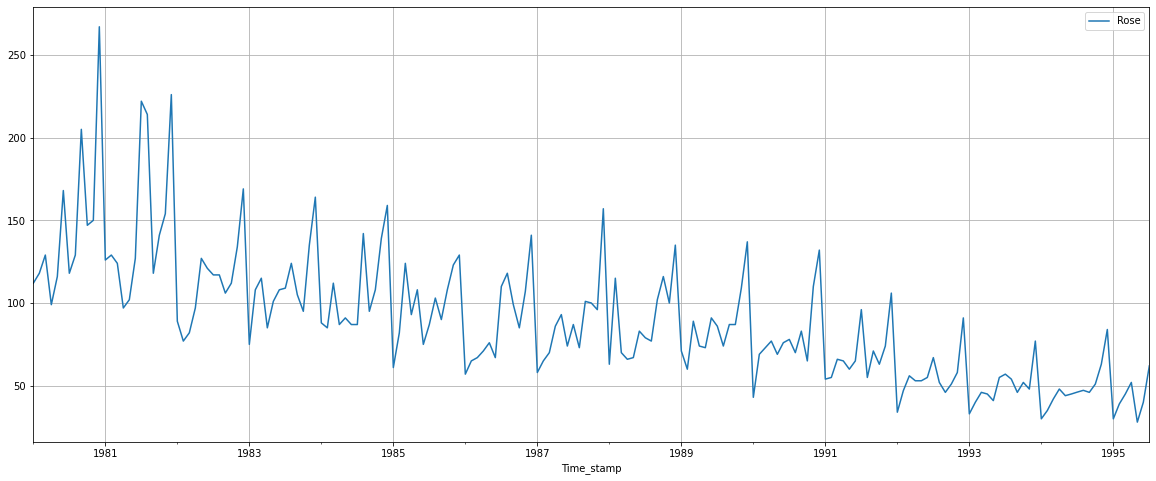

In [15]:
df.plot(grid = True);

Continuous plot is observed

In [16]:
#Decriptive Statistics
df.describe()

,Rose
count,187.000000
mean,89.927152
std,39.224081
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


**2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.**

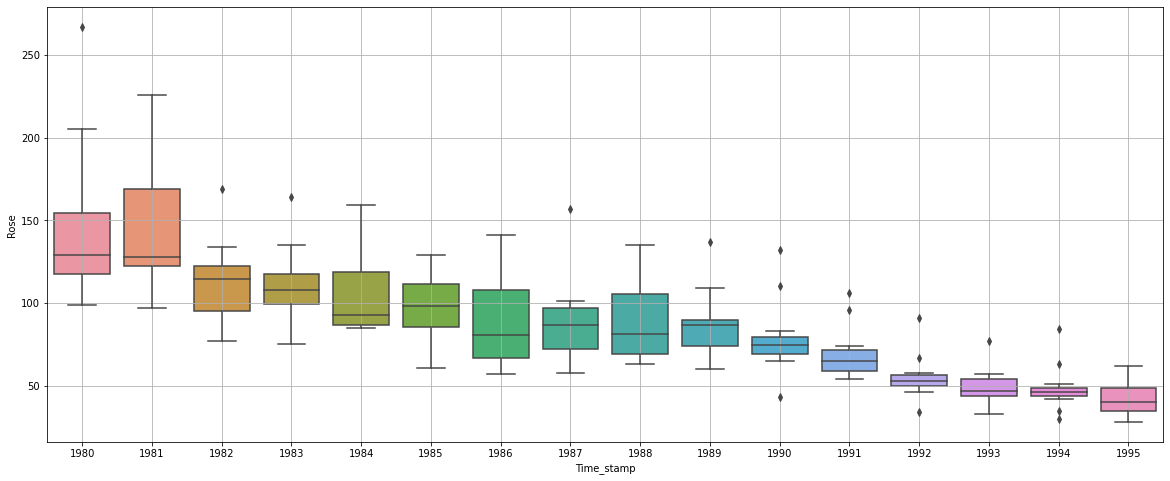

In [17]:
# plot a boxplot to understand the spread of sales across different years
sns.boxplot(x = df.index.year, y = df['Rose'])
plt.grid()

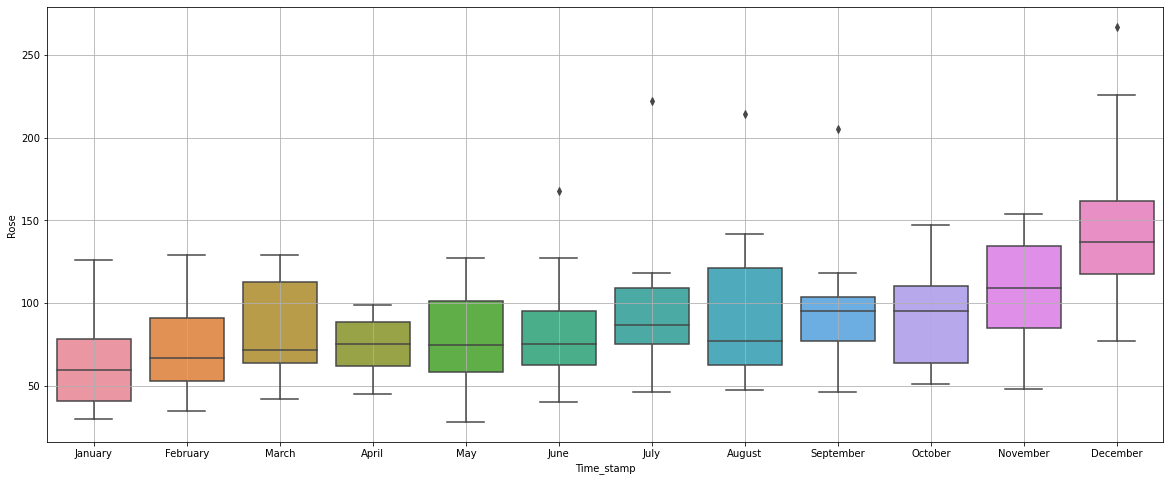

In [18]:
#Monthly boxplot
sns.boxplot(x = df.index.month_name(), y = df['Rose'])
plt.grid()

From Year plot, we can notice trend is decreasing.

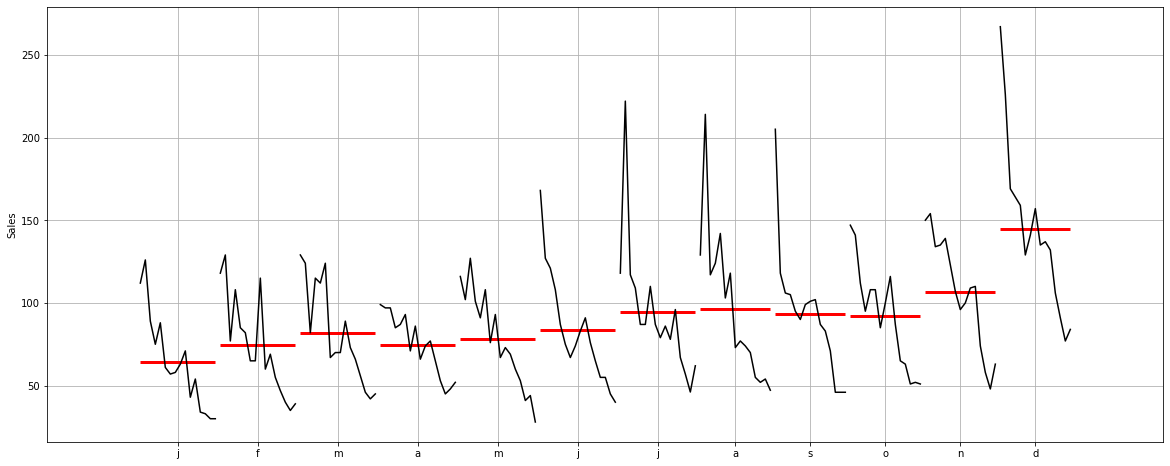

In [19]:
#monthplot_sales across different years and within different months across years.
month_plot(df['Rose'], ylabel = 'Sales')
plt.grid()

This plot shows us behaviour of time series across months.

In [20]:
#Plot a graph of monthly sales
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


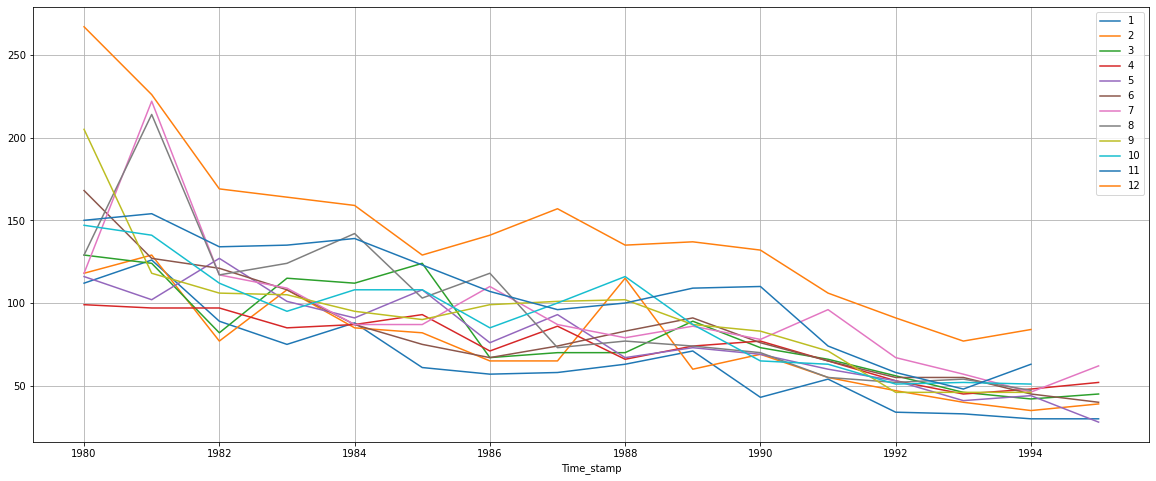

In [21]:
monthly_sales_across_years.plot(grid = True);
plt.legend(loc= 'best');

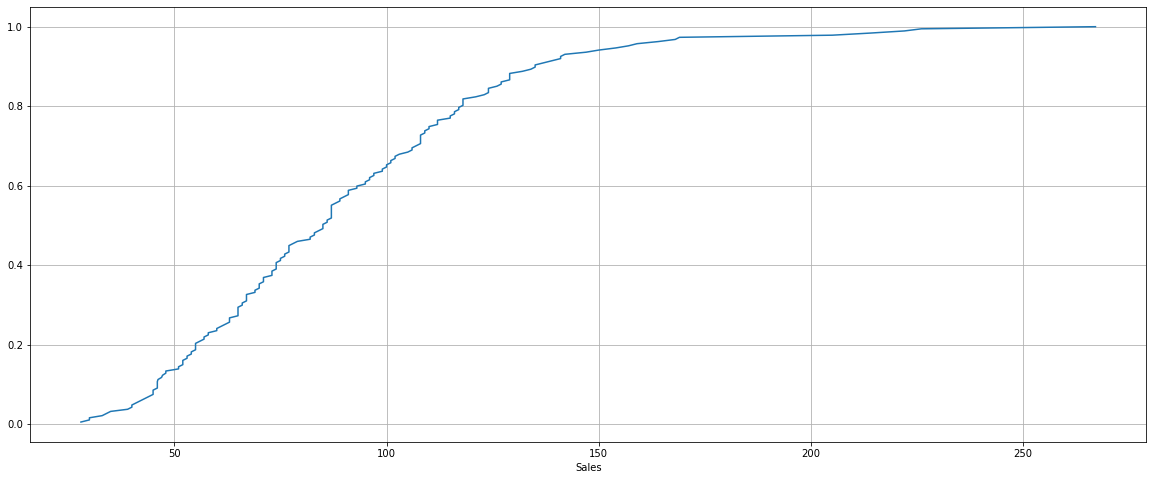

In [22]:
#Plot the empirical cumulative distribution
plt.figure(figsize = (20,8));
cdf = ECDF(df['Rose']);
plt.plot(cdf.x, cdf.y,label='statsmodels');
plt.grid();
plt.xlabel('Sales');

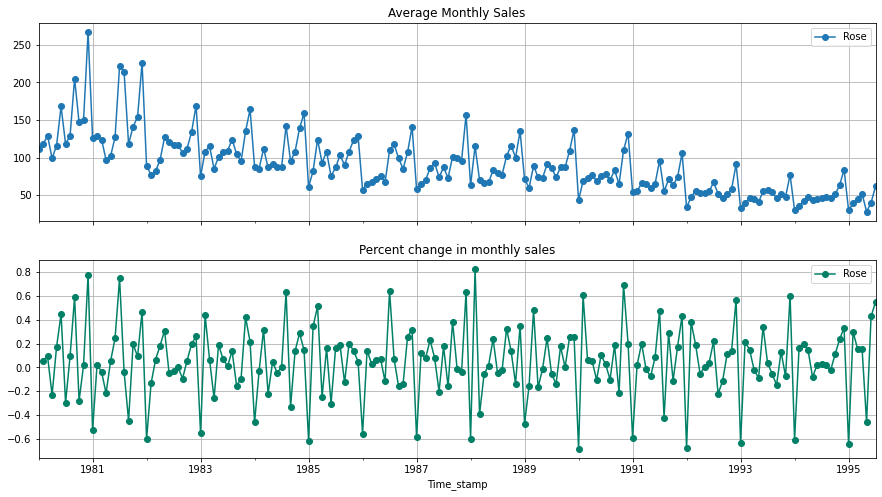

In [23]:
#Plot the average Sales per month and month on month percentage change of sales
#group by sales and get average sales and change in percentage of sale
average = df.groupby(df.index)['Rose'].mean()
pct_change = df.groupby(df.index)['Rose'].sum().pct_change()

fig , (axis1, axis2) = plt.subplots(2,1,sharex=True,figsize = (15,8))
# plot average sales over time

ax1 = average.plot(legend = True, ax = axis1, marker = 'o', title = 'Average Monthly Sales', grid = True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot percentage change in sales
ax2 = pct_change.plot(legend = True, ax = axis2, marker = 'o',colormap = 'summer',title = 'Percent change in monthly sales', grid = True)

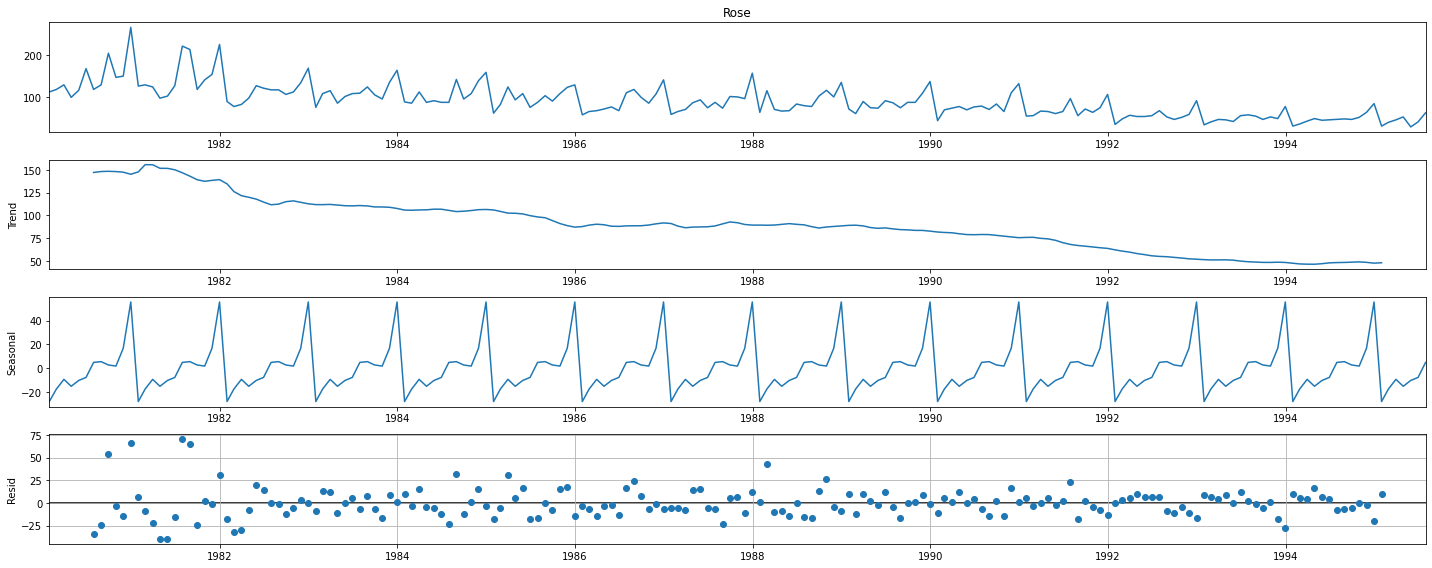

In [24]:
#Decompose Time series and plot different components
# additive decomposition
decomposition = seasonal_decompose(df['Rose'], model = 'additive')
decomposition.plot();
plt.grid()

From the above plot, it is clear that data has decreasing trend and seasonality. Residual has some patterns. so lets explore multiplicative model.

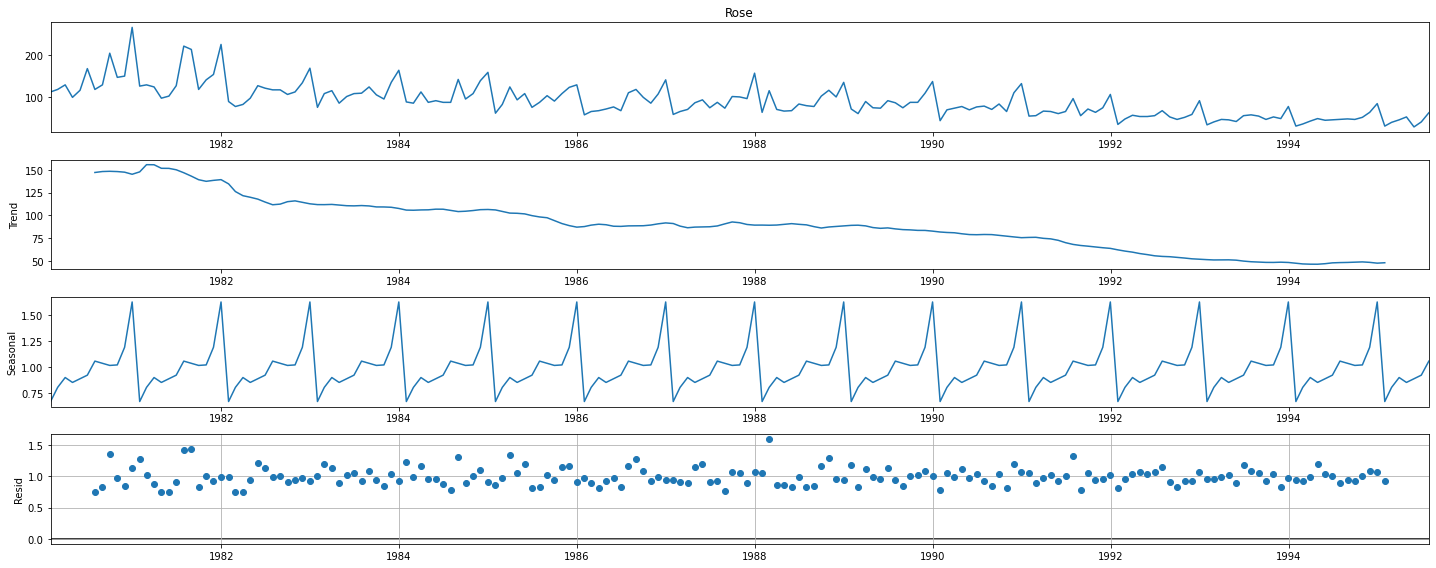

In [25]:
#Multiplicative decomposition
decomposition1 = seasonal_decompose(df['Rose'], model = 'multiplicative')
decomposition1.plot();
plt.grid()

Multiplicative model's trend and seasonality are same. Residual has some patterns. so additive model is considered for further analysis.

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n', trend.head(10), '\n')
print('seasonality','\n', seasonality.head(10), '\n')
print('residual','\n', residual.head(10), '\n')

Trend 
 Time_stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
Name: trend, dtype: float64 

seasonality 
 Time_stamp
1980-01-31   -27.921848
1980-02-29   -17.445147
1980-03-31    -9.299974
1980-04-30   -15.112474
1980-05-31   -10.210688
1980-06-30    -7.692831
1980-07-31     4.938518
1980-08-31     5.590168
1980-09-30     2.761485
1980-10-31     1.858708
Name: seasonal, dtype: float64 

residual 
 Time_stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -34.021852
1980-08-31   -24.715168
1980-09-30    53.863515
1980-10-31    -2.942041
Name: resid, dtype: float64 



**3. Split the data into training and test. The test data should start in 1991.**

In [27]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [28]:
from IPython.display import display #Todisplay multiple dataframe from one cell

In [29]:
print('First few rows of training data')
display(train.head())
print('Last few rows of training data')
display(train.tail())
print('First few rows of testing data')
display(test.head())
print('Last few rows of testing data')
display(test.tail())

First few rows of training data


,Rose
Time_stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of training data


,Rose
Time_stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of testing data


,Rose
Time_stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of testing data


,Rose
Time_stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [30]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


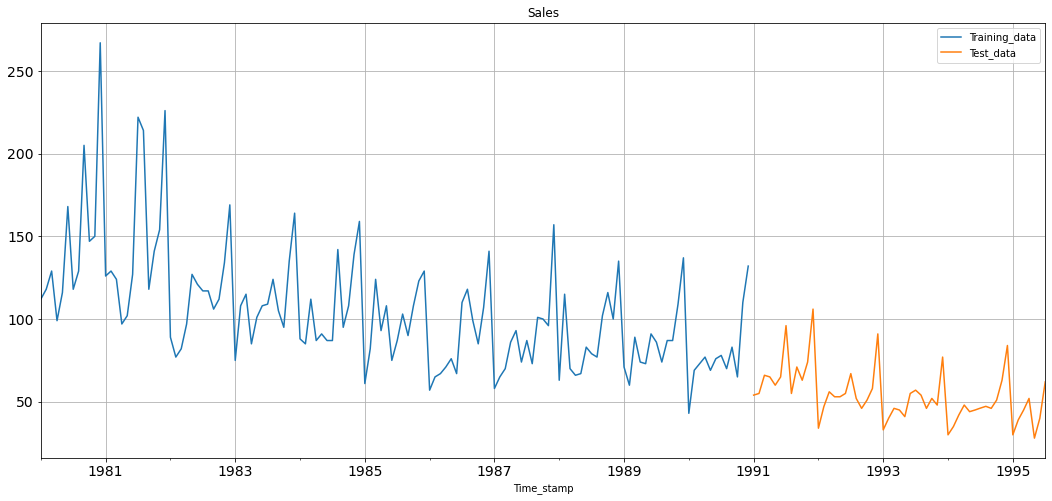

In [31]:
train['Rose'].plot(figsize = (18,8), fontsize = 14)
test['Rose'].plot(figsize = (18,8), fontsize = 14)
plt.grid()
plt.legend(['Training_data','Test_data'])
plt.title('Sales')
plt.show()

**4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.**

### Model 1 : Linear Regression

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [32]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance', '\n',train_time)
print('Test Time instance', '\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [33]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [34]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of training data', '\n', LinearRegression_train.head(),'\n')
print('Last few rows of training data', '\n', LinearRegression_train.tail(),'\n')
print('First few rows of test data', '\n', LinearRegression_test.head(),'\n')
print('First few rows of test data', '\n', LinearRegression_test.head(),'\n')

First few rows of training data 
              Rose  time
Time_stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of training data 
              Rose  time
Time_stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of test data 
             Rose  time
Time_stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

First few rows of test data 
             Rose  time
Time_stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 



In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

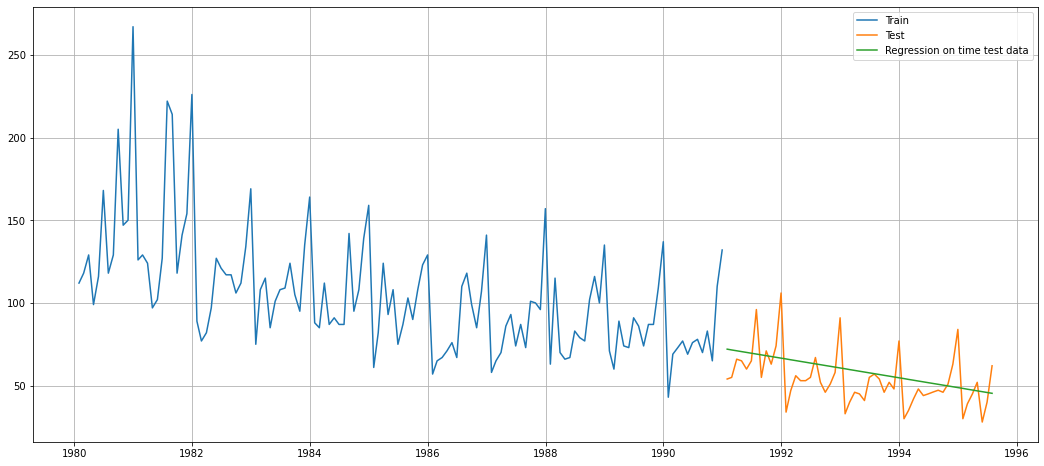

In [37]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize = (18,8))
plt.plot(train['Rose'],label = 'Train')
plt.plot(test['Rose'], label = 'Test')
plt.plot(LinearRegression_test['RegOnTime'], label = 'Regression on time test data')
plt.legend(loc = 'best')
plt.grid()

In [38]:
from sklearn import metrics #Accuracy metrics

In [39]:
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.255


In [40]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.255435


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [41]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [42]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

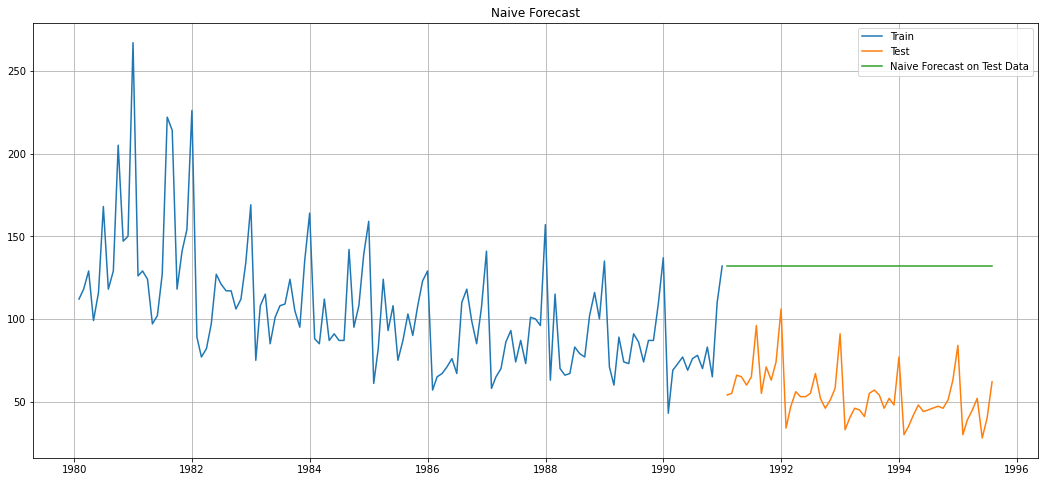

In [43]:
plt.figure(figsize=(18,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [44]:
## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 79.672


In [45]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238


### Model 3: Simple Average

### For this particular simple average method, we will forecast by using the average of the training values.

In [46]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [47]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


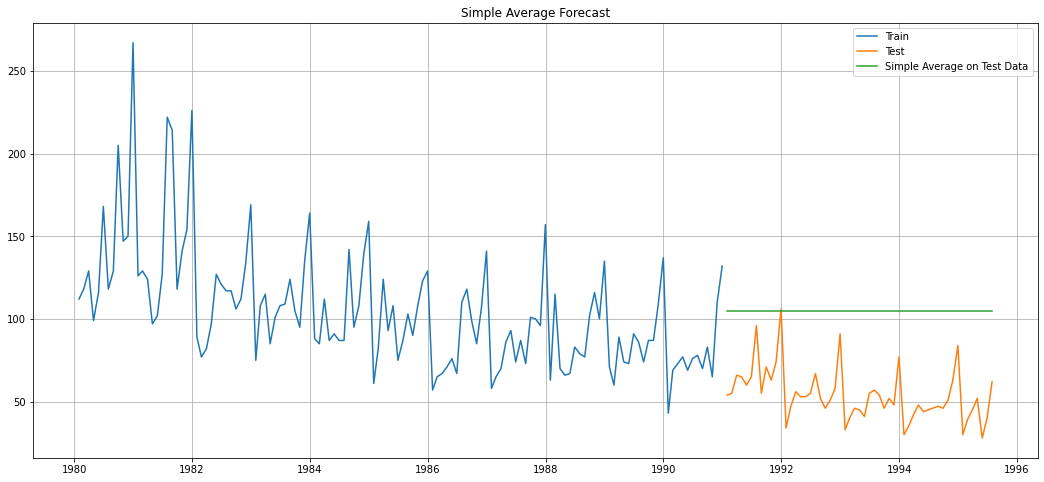

In [48]:
plt.figure(figsize=(18,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [49]:
## Test Data - RMSE 
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.413


In [50]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057


### Model 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here. For Moving Average, we are going to average over the entire data.

In [51]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Time_stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


#### Trailing moving averages

In [52]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


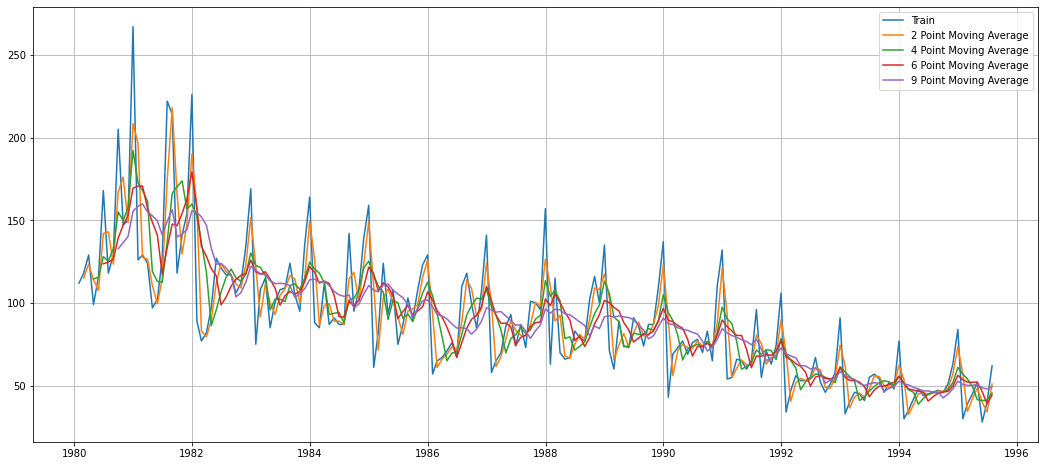

In [53]:
## Plotting on the whole data
plt.figure(figsize=(18,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [54]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.709677)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.709677):]

In [55]:
trailing_MovingAverage_train.count()

Rose          132
Trailing_2    131
Trailing_4    129
Trailing_6    127
Trailing_9    124
dtype: int64

In [56]:
trailing_MovingAverage_test.count()

Rose          55
Trailing_2    55
Trailing_4    55
Trailing_6    55
Trailing_9    55
dtype: int64

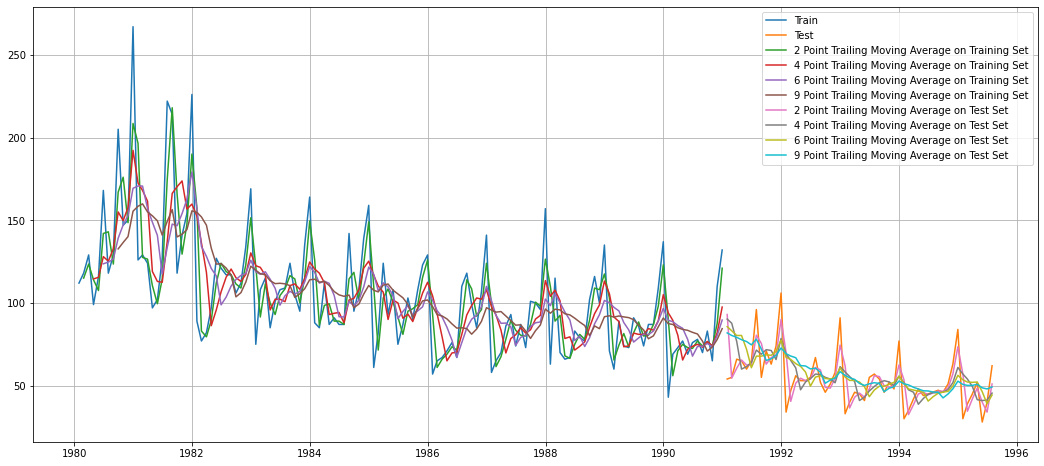

In [57]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'],label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'],label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label= '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label= '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label= '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label= '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation done only on the test data.

In [58]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.444
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.555
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.721 


In [59]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499


### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

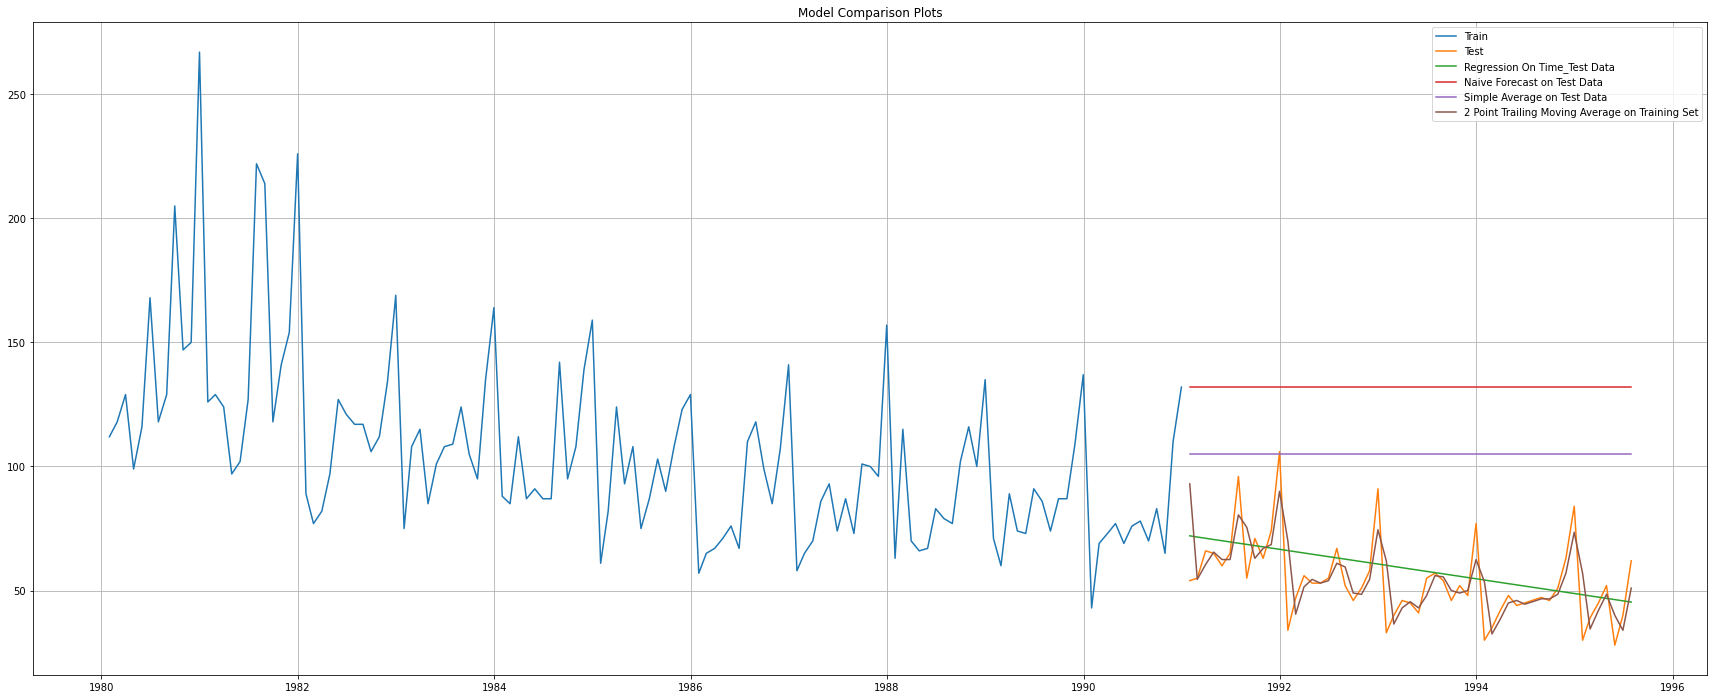

In [60]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Model 5: Simple Exponential Smoothing

In [61]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [62]:
SES_train = train.copy()
SES_test = test.copy()

In [63]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [64]:
model_SES_autofit = model_SES.fit(optimized=True)

In [65]:
model_SES_autofit.params

{'smoothing_level': 0.0987499363908956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38688235486416,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [66]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
Time_stamp,,
1991-01-31,54.0,87.105
1991-02-28,55.0,87.105
1991-03-31,66.0,87.105
1991-04-30,65.0,87.105
1991-05-31,60.0,87.105


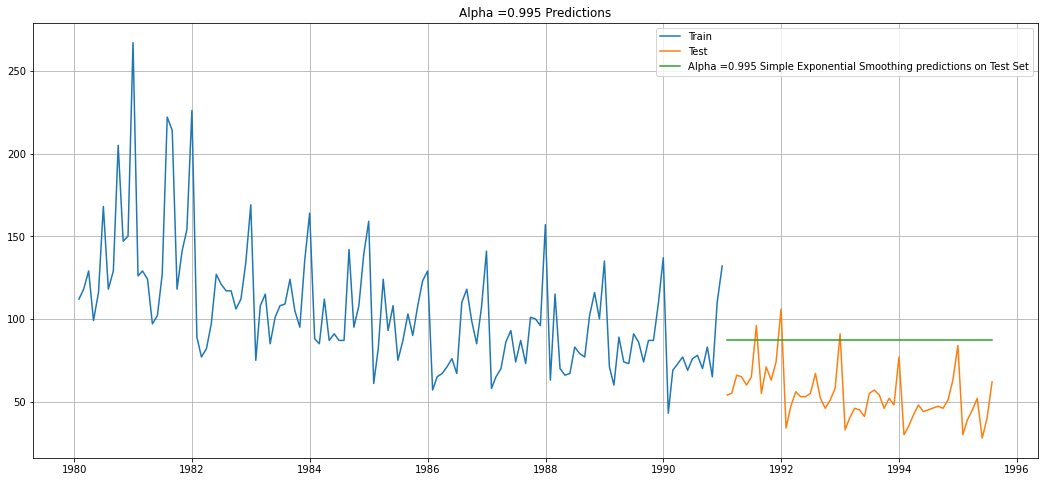

In [67]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

### Model Evaluation for $\alpha$ = 0.995 : Simple Exponential Smoothing

In [68]:
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.748


In [69]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
"Alpha=0.995,SimpleExponentialSmoothing",36.748162


Setting different alpha values. Higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again. We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [70]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [71]:
for i in np.arange(0.3,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

### Model Evaluation

In [72]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,32.470164,47.457057
1,0.4,33.035130,53.719906
2,0.5,33.682839,59.594532
3,0.6,34.441171,64.924245
4,0.7,35.323261,69.651295
5,0.8,36.334596,73.727266
6,0.9,37.482782,77.092660
7,1.0,38.783783,79.672238


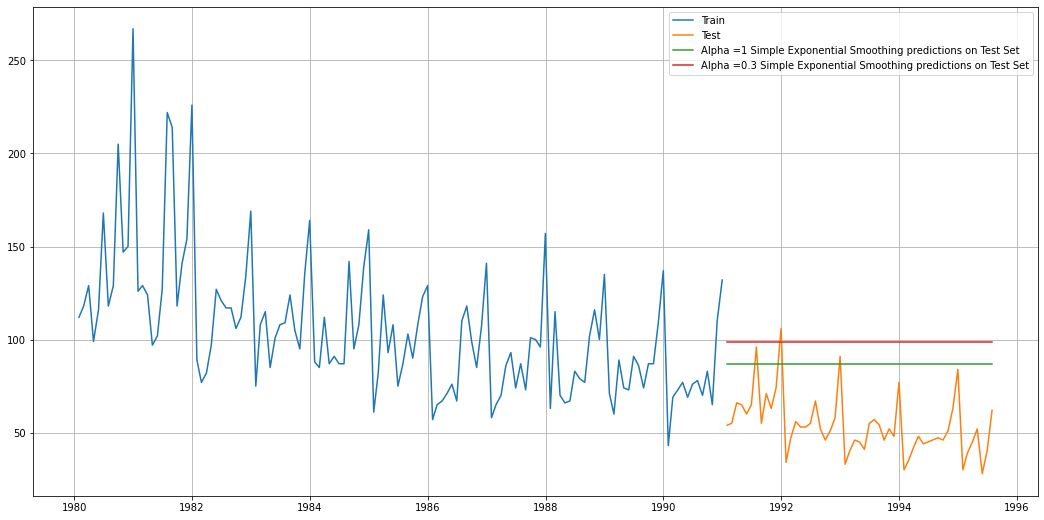

In [73]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [74]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
"Alpha=0.995,SimpleExponentialSmoothing",36.748162
"Alpha=0.3,SimpleExponentialSmoothing",47.457057


## Model 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [75]:
DES_train = train.copy()
DES_test = test.copy()

In [76]:
model_DES = Holt(DES_train['Rose'])

In [77]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [78]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [79]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.944983,265.509912
1,0.3,0.4,37.393239,358.693008
2,0.3,0.5,38.888325,451.752171
3,0.3,0.6,40.280670,536.896028
4,0.3,0.7,41.403518,601.558209
...,...,...,...,...
59,1.0,0.6,51.831610,801.622225
60,1.0,0.7,54.497039,841.834548
61,1.0,0.8,57.365879,853.907502
62,1.0,0.9,60.474309,834.652915


In [80]:
#sort the data frame in the ascending ordering of the 'Test RMSE' values.
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.944983,265.509912
8,0.4,0.3,36.749123,339.248849
1,0.3,0.4,37.393239,358.693008
16,0.5,0.3,37.433314,394.214956
24,0.6,0.3,38.348984,439.238366


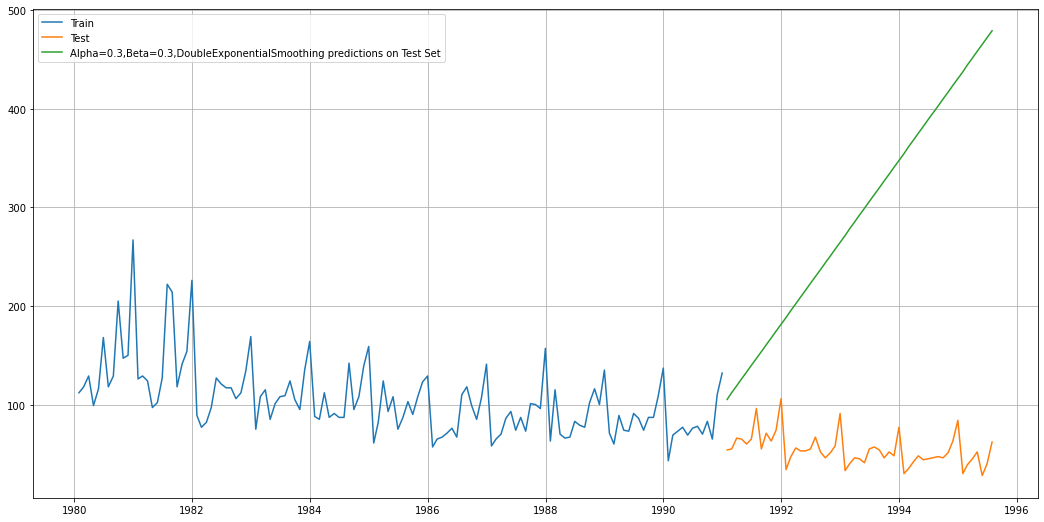

In [81]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [82]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
"Alpha=0.995,SimpleExponentialSmoothing",36.748162
"Alpha=0.3,SimpleExponentialSmoothing",47.457057
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.509912


### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [83]:
TES_train = train.copy()
TES_test = test.copy()

In [84]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [85]:
model_TES_autofit = model_TES.fit()

In [86]:
model_TES_autofit.params

{'smoothing_level': 0.07597910648900096,
 'smoothing_trend': 0.0407534388288674,
 'smoothing_seasonal': 0.00046936565708941843,
 'damping_trend': nan,
 'initial_level': 53.2110717778787,
 'initial_trend': -0.3102118953915562,
 'initial_seasons': array([2.1068438 , 2.38871538, 2.61176436, 2.28193244, 2.56727764,
        2.79378656, 3.07384882, 3.27436484, 3.09278113, 3.03149633,
        3.53381687, 4.87169462]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_stamp,,
1991-01-31,54.0,56.042556
1991-02-28,55.0,63.341718
1991-03-31,66.0,69.018232
1991-04-30,65.0,60.105997
1991-05-31,60.0,67.377021


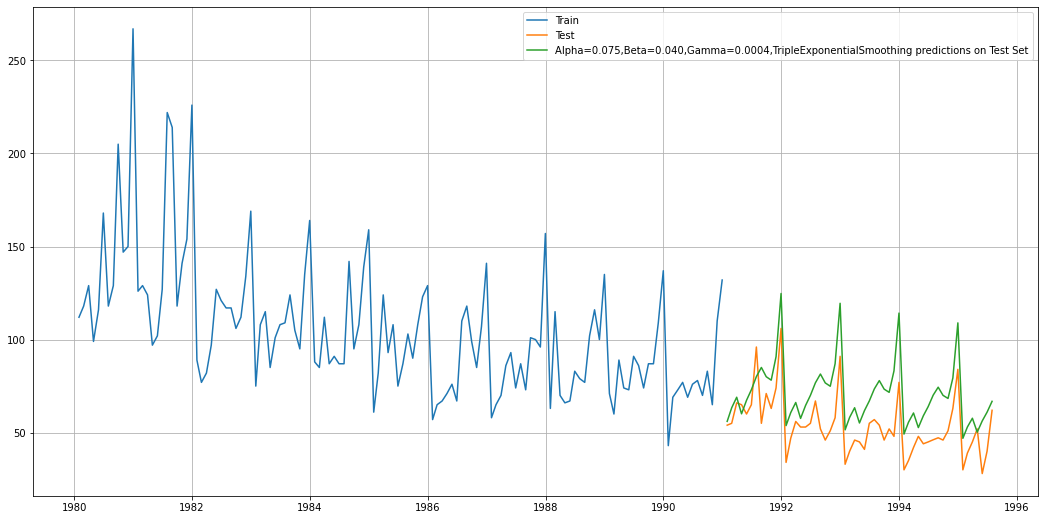

In [88]:
## Plotting on both the Training and Test using autofit
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [89]:
## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.075,Beta=0.040,Gamma=0.0004, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.075,Beta=0.040,Gamma=0.0004, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 19.322


In [90]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
"Alpha=0.995,SimpleExponentialSmoothing",36.748162
"Alpha=0.3,SimpleExponentialSmoothing",47.457057
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.509912


In [91]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [92]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [93]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,27.217969,19.018716
1,0.3,0.3,0.4,27.399095,11.243009
2,0.3,0.3,0.5,27.928512,30.621815
3,0.3,0.3,0.6,28.888611,63.675460
4,0.3,0.3,0.7,30.568635,122.520492
...,...,...,...,...,...
507,1.0,1.0,0.6,28358.458519,9603.625662
508,1.0,1.0,0.7,30724.126331,23029.955196
509,1.0,1.0,0.8,1218.755446,9626.719063
510,1.0,1.0,0.9,14150.253251,9691.906782


In [94]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
8,0.3,0.4,0.3,28.111886,10.935749
1,0.3,0.3,0.4,27.399095,11.243009
69,0.4,0.3,0.8,32.601491,12.624534
16,0.3,0.5,0.3,29.087520,14.461672
131,0.5,0.3,0.6,32.144773,16.762882


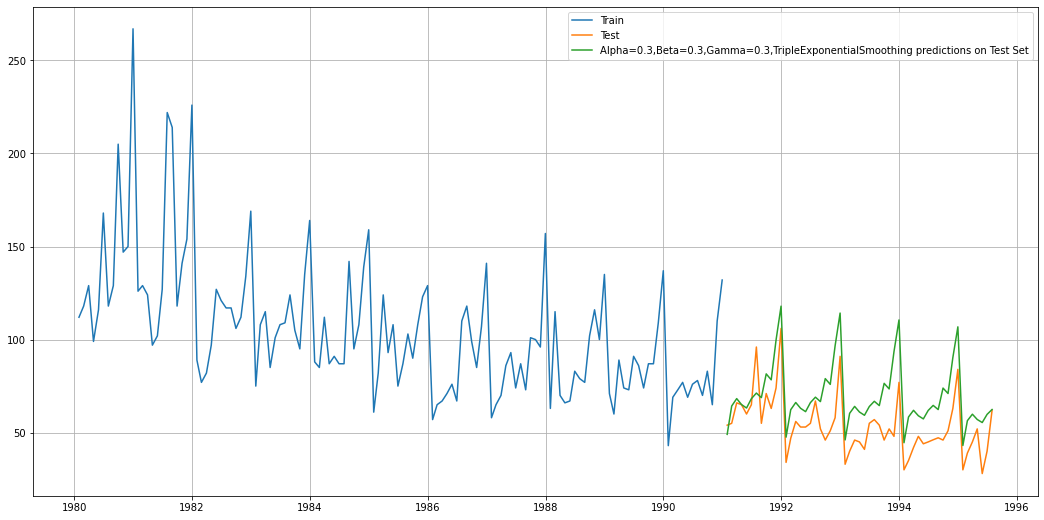

In [95]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [96]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
"Alpha=0.995,SimpleExponentialSmoothing",36.748162
"Alpha=0.3,SimpleExponentialSmoothing",47.457057
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.509912


In [97]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",10.935749
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
RegressionOnTime,15.255435
"Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing",19.322173
"Alpha=0.995,SimpleExponentialSmoothing",36.748162
"Alpha=0.3,SimpleExponentialSmoothing",47.457057
SimpleAverageModel,53.413057


**5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.**

### Dickey Fuller Test

Null Hypothesis $H_0$- Series is not Stationary

Alternative Hypothesis $H_1$- Series is Stationary

In [98]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

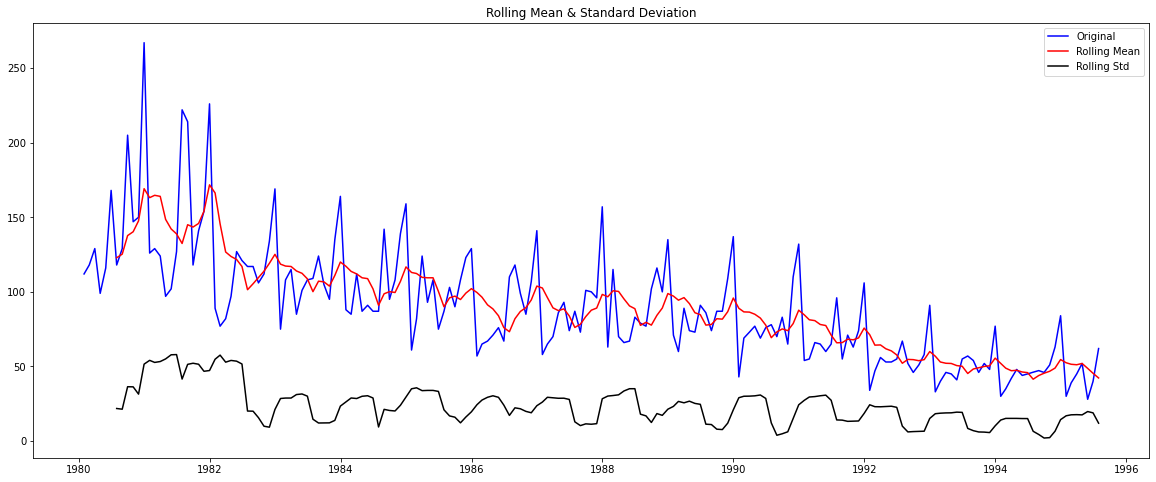

Results of Dickey-Fuller Test:
Test Statistic                  -1.880931
p-value                          0.341084
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [99]:
test_stationarity(df['Rose'])

We see that at 5% significant level the Time Series is non-stationary. Let us take a difference of order 1 and check whether the Time Series is stationary or not.

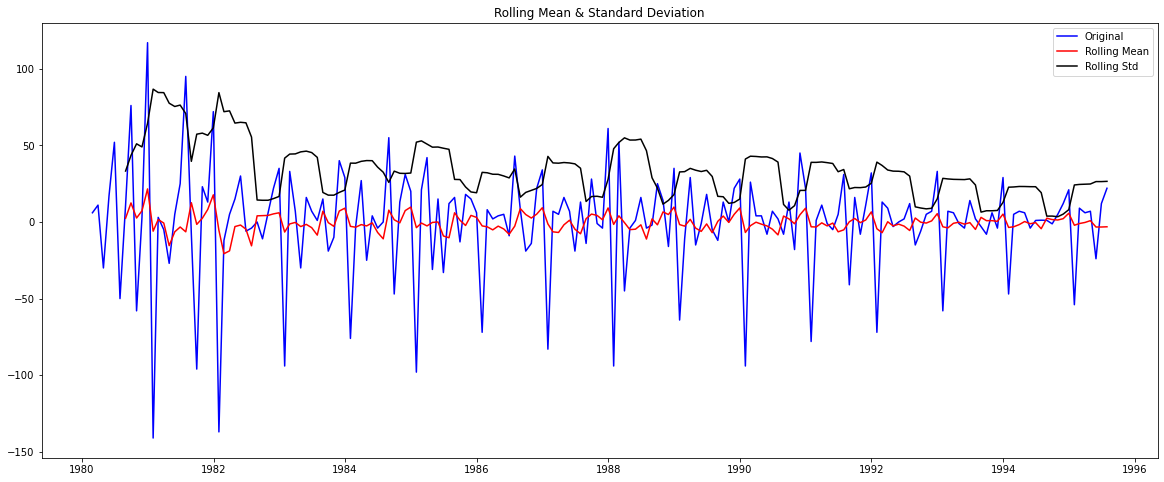

Results of Dickey-Fuller Test:
Test Statistic                -8.044820e+00
p-value                        1.806363e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [100]:
test_stationarity(df['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

**6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.**

### Automated Version of ARIMA

In [101]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [102]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [103]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.72618304641
ARIMA(0, 1, 2) - AIC:1276.8353820476282
ARIMA(1, 1, 0) - AIC:1319.3483105802752
ARIMA(1, 1, 1) - AIC:1277.7757470789425
ARIMA(1, 1, 2) - AIC:1277.3592272256828
ARIMA(2, 1, 0) - AIC:1300.6092611744048
ARIMA(2, 1, 1) - AIC:1279.0456894093106
ARIMA(2, 1, 2) - AIC:1279.2986939365776


In [104]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835382
5,"(1, 1, 2)",1277.359227
4,"(1, 1, 1)",1277.775747
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [105]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.168
Date:                Sun, 05 Sep 2021   AIC                           1276.835
Time:                        13:05:37   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7600      0.101     -7.500      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

### Predict on the Test Set using this model and evaluate the model.

In [106]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [107]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.6059416269165


In [108]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
"Alpha=0.995,SimpleExponentialSmoothing",36.748162
"Alpha=0.3,SimpleExponentialSmoothing",47.457057
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.509912


### Automated Version of SARIMA

In [109]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [110]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [111]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720741
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380888
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385133
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752322
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069755
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945684
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918343
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383848
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918273
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094719
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483299725
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535973
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461663
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988349389337
SARIMA(0, 1, 2)x(0, 0, 0

In [112]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.686897
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [113]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 05 Sep 2021   AIC                            887.938
Time:                                    13:06:38   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.512     -0.004      0.996    -372.279     370.593
ma.L2         -0.1573     29.773   

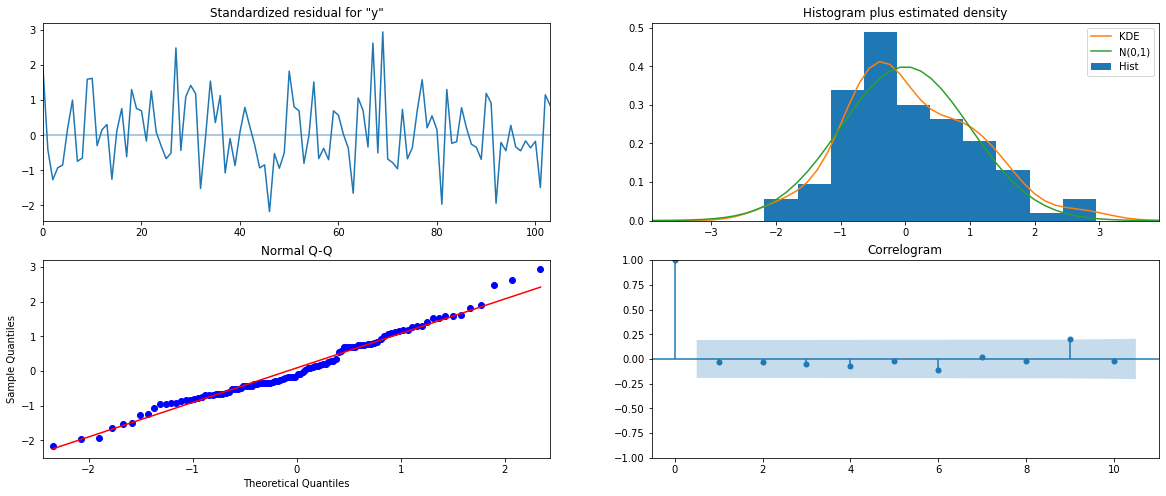

In [114]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [115]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [116]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867261,15.928500,31.647975,94.086547
1,70.541189,16.147658,38.892362,102.190017
2,77.356410,16.147655,45.707587,109.005233
3,76.208813,16.147655,44.559990,107.857637
4,72.747397,16.147655,41.098574,104.396220


In [117]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.880624600583097


In [118]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])
resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
"Alpha=0.995,SimpleExponentialSmoothing",36.748162
"Alpha=0.3,SimpleExponentialSmoothing",47.457057
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.509912


**7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.**

#### ARIMA Model based on ACF and PACF

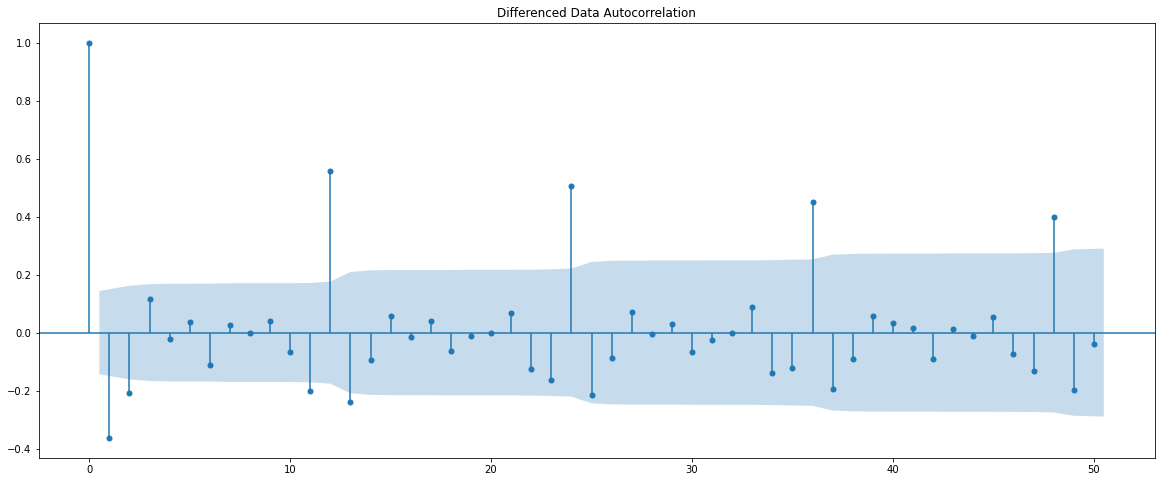

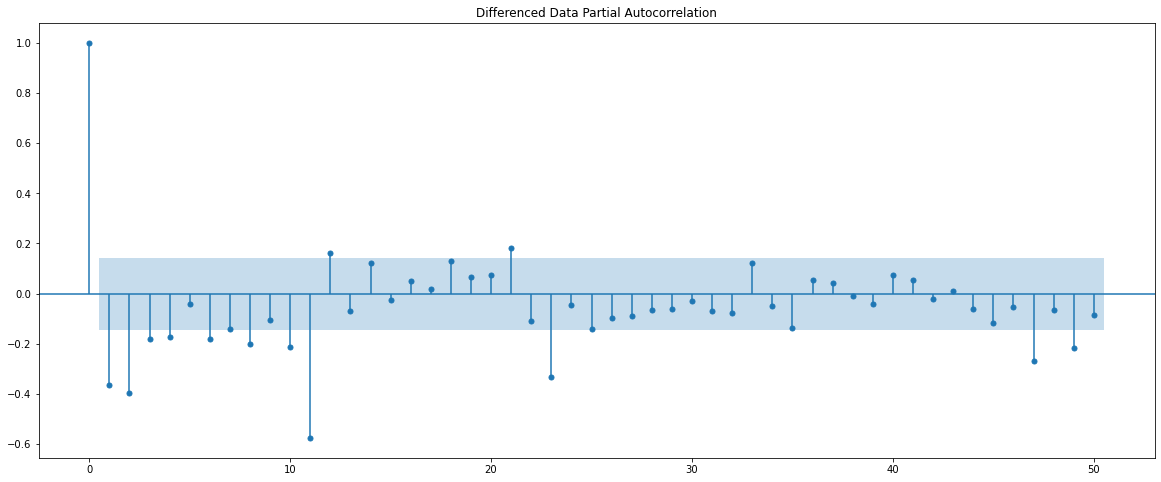

In [119]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 4 and 2.

In [120]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(4,1,2),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Sun, 05 Sep 2021   AIC                           1283.753
Time:                        13:06:41   BIC                           1306.754
Sample:                    02-29-1980   HQIC                          1293.099
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.69

### Predict on the Test Set using this model and evaluate the model.

In [121]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [122]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

33.90374354875648


In [123]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA (4,1,2) based on ACF & PACF'])
resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
"Alpha=0.995,SimpleExponentialSmoothing",36.748162
"Alpha=0.3,SimpleExponentialSmoothing",47.457057
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.509912


### SARIMA Model : Manually looking at ACF and PACF

Let us look at the ACF and the PACF plots once more.

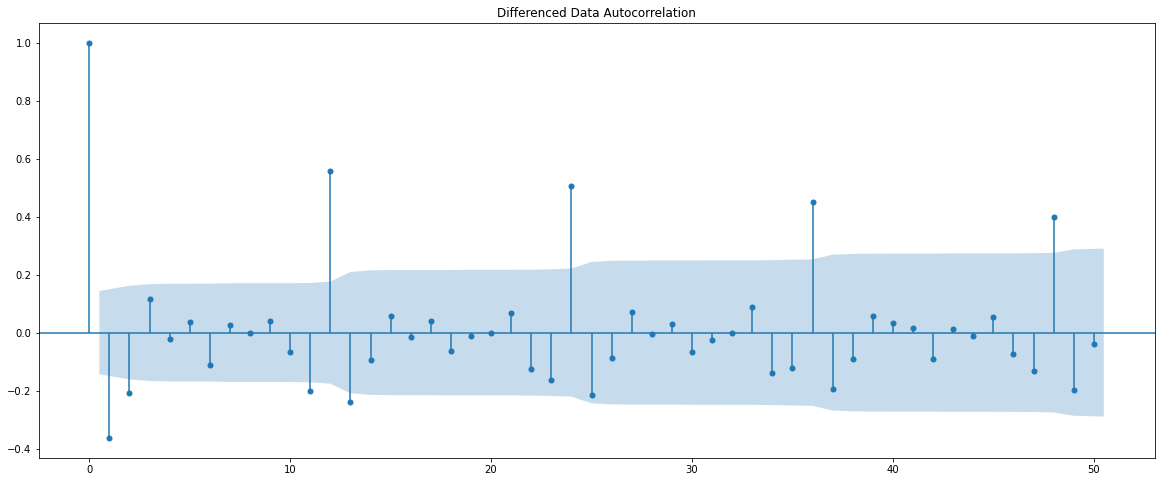

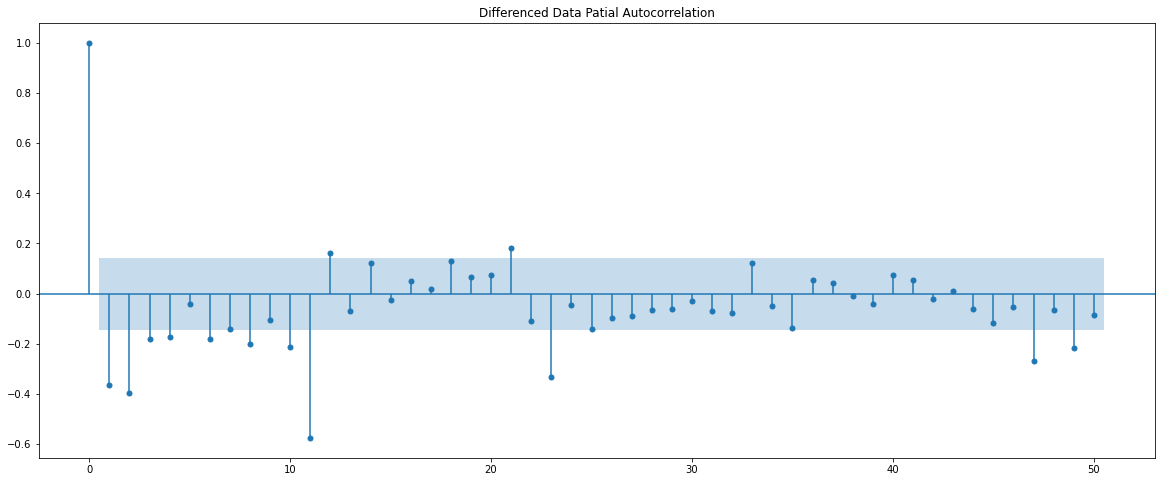

In [124]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

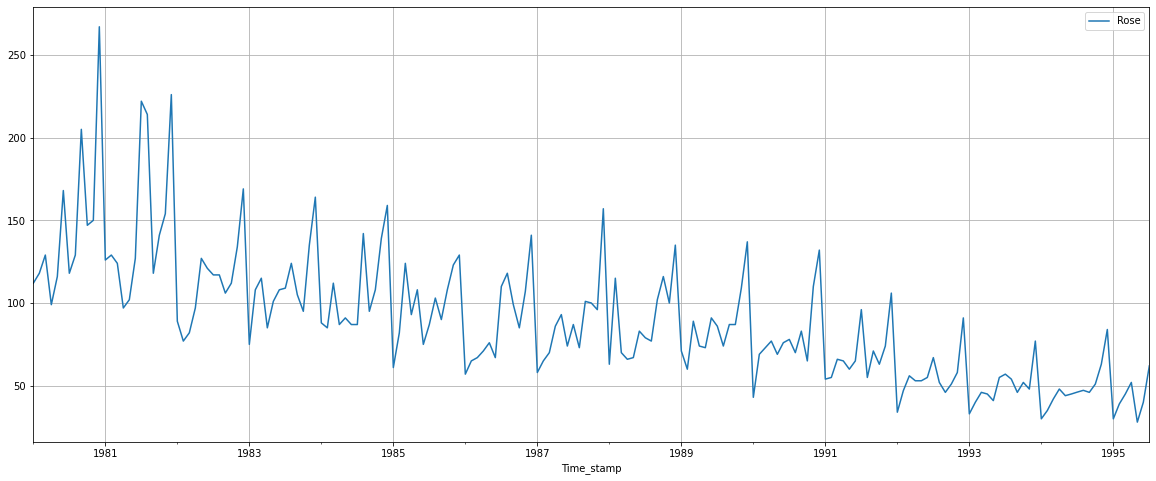

In [125]:
df.plot()
plt.grid();

We see that there is a seasonality. So, now we take a seasonal differencing and check the series.

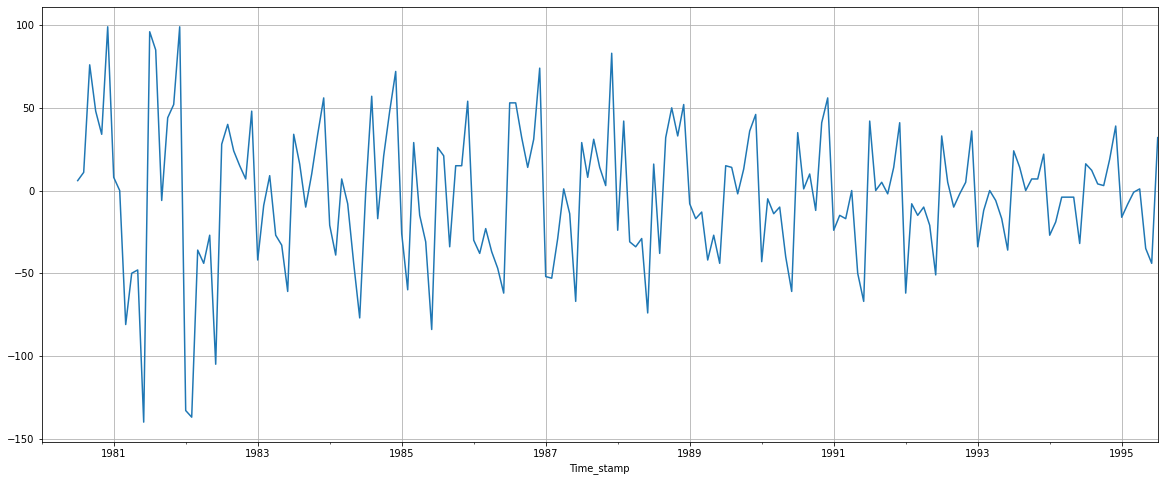

In [126]:
(df['Rose'].diff(6)).plot()
plt.grid();

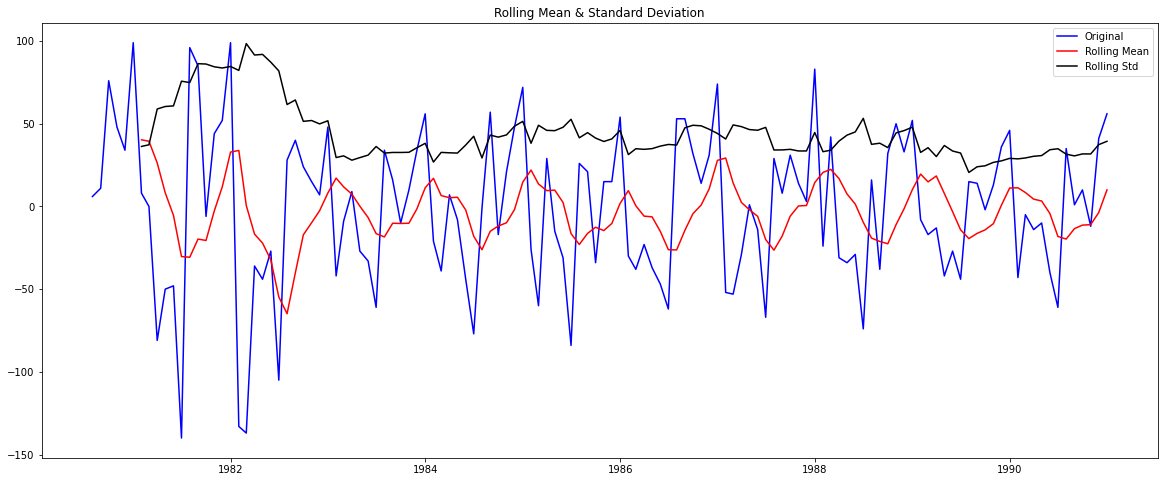

Results of Dickey-Fuller Test:
Test Statistic                -7.442449e+00
p-value                        5.956534e-11
#Lags Used                     7.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [127]:
test_stationarity(train['Rose'].diff(6).dropna())

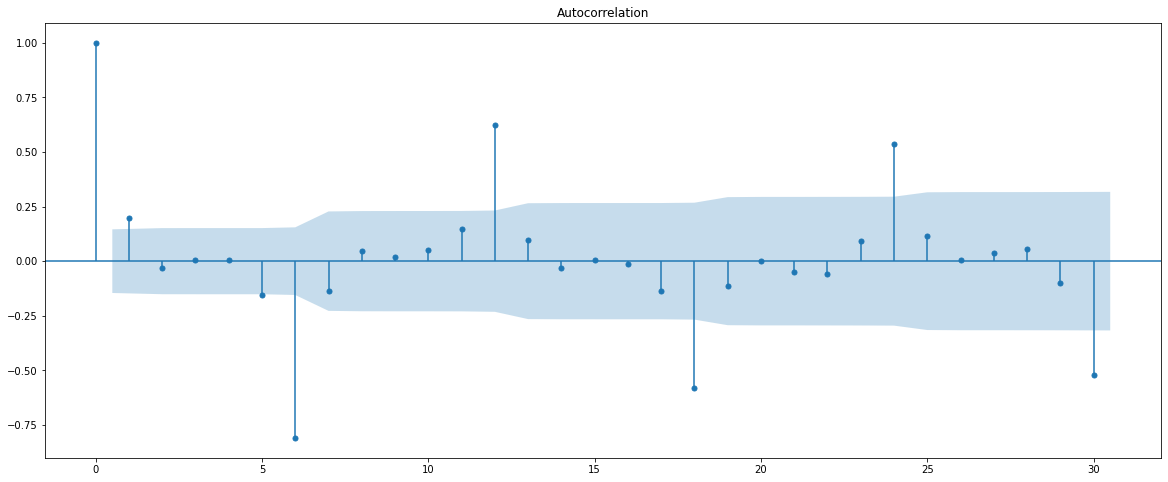

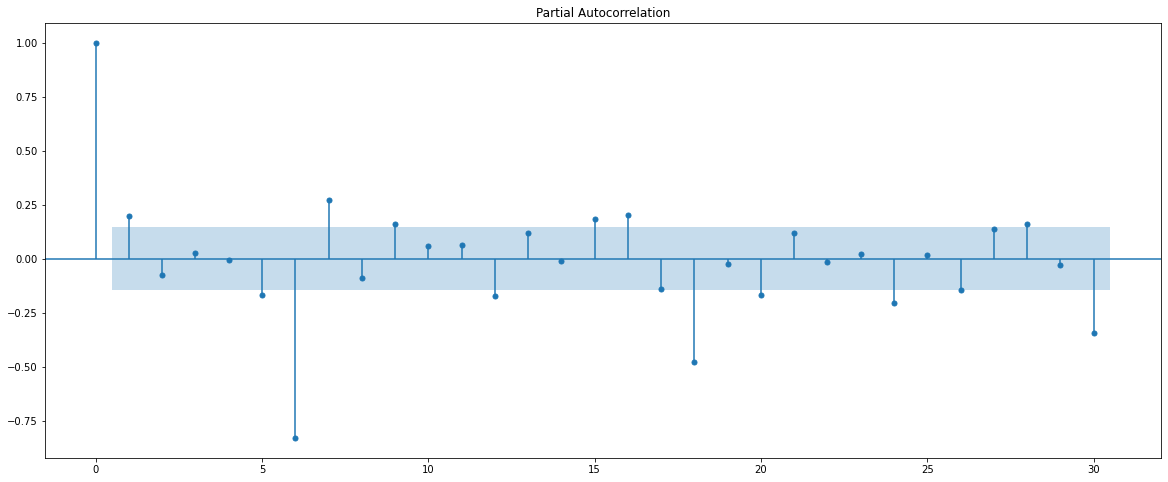

In [128]:
plot_acf((df['Rose'].diff(6).dropna()),lags=30)
plot_pacf((df['Rose'].diff(6).dropna()),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF cut-off at 1 & 1 .

In [129]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(1, 1, [1], 6)   Log Likelihood                -540.333
Date:                             Sun, 05 Sep 2021   AIC                           1098.665
Time:                                     13:06:46   BIC                           1123.370
Sample:                                          0   HQIC                          1108.693
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4668      0.356     -1.310      0.190      -1.165       0.231
ar.L2         -0.6301      

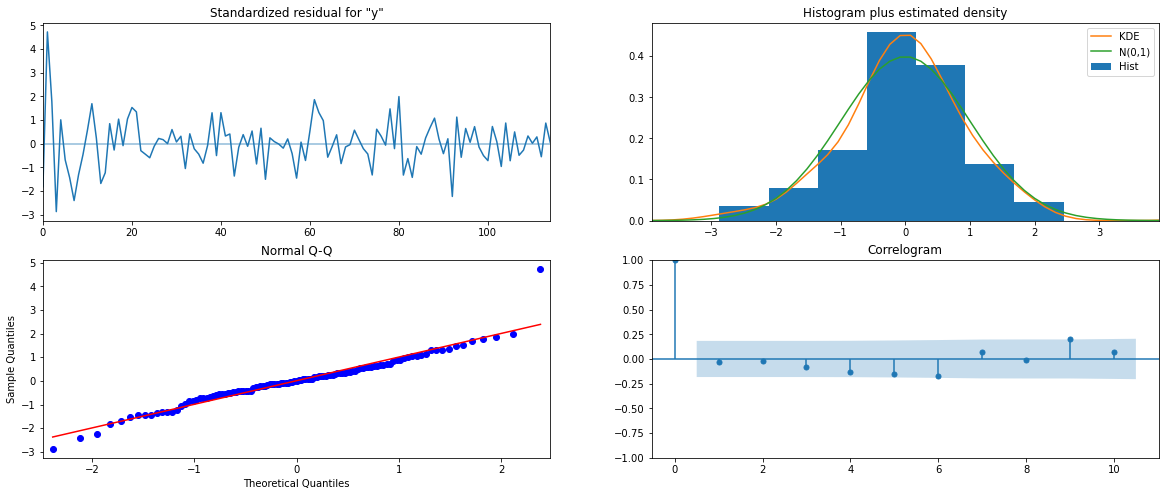

In [130]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [131]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [132]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,43.074435,26.574002,-9.009651,95.158521
1,65.094398,28.707918,8.827913,121.360883
2,70.508113,28.742646,14.173563,126.842663
3,73.747771,29.470888,15.985893,131.509649
4,75.722800,30.800047,15.355818,136.089782


In [133]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

23.037273108439216


In [134]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4,1,2)(1,1,1,6) based on ACF & PACF'])
resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
"Alpha=0.995,SimpleExponentialSmoothing",36.748162
"Alpha=0.3,SimpleExponentialSmoothing",47.457057
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.509912


**8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.**

In [135]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",10.935749
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
RegressionOnTime,15.255435
"ARIMA(0,1,2)",15.605942
"Alpha=0.075,Beta=0.040,Gamma=0.0004,TripleExponentialSmoothing",19.322173
"SARIMA(4,1,2)(1,1,1,6) based on ACF & PACF",23.037273
"SARIMA(0,1,2)(2,0,2,12)",26.880625


**9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.**

#### Best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.3, $\beta$ = 0.3 and $\gamma$ = 0.3.Building the most optimum model on the Full Data.

In [136]:
Full_model_TES = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [137]:
full_model_TES = Full_model_TES.fit(smoothing_level=0.3,
                                    smoothing_trend=0.3,
                                    smoothing_seasonal=0.3)

In [138]:
RMSE_fullmodel = metrics.mean_squared_error(df['Rose'],full_model_TES.fittedvalues,squared=False)
print('RMSE:',RMSE_fullmodel)

RMSE: 19.95773584050619


In [139]:
# Getting the predictions for future in 12 steps
prediction = full_model_TES.forecast(steps=12)

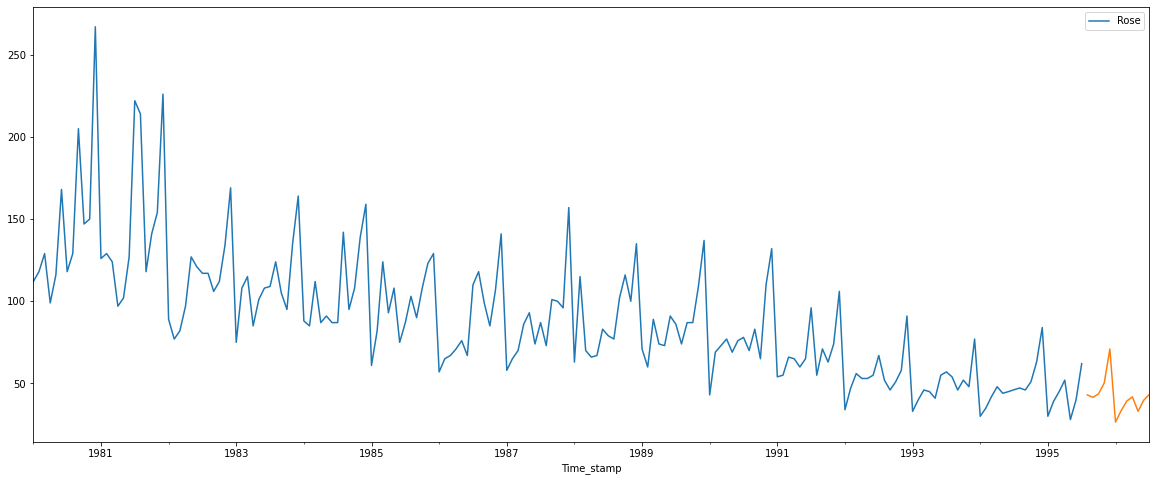

In [140]:
df.plot()
prediction.plot();

In [141]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction- 1.96*np.std(full_model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(full_model_TES.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,3.801629,43.008486,82.215344
1995-09-30,2.303920,41.510778,80.717636
1995-10-31,4.472140,43.678998,82.885855
1995-11-30,11.061361,50.268219,89.475076
1995-12-31,31.744942,70.951800,110.158658


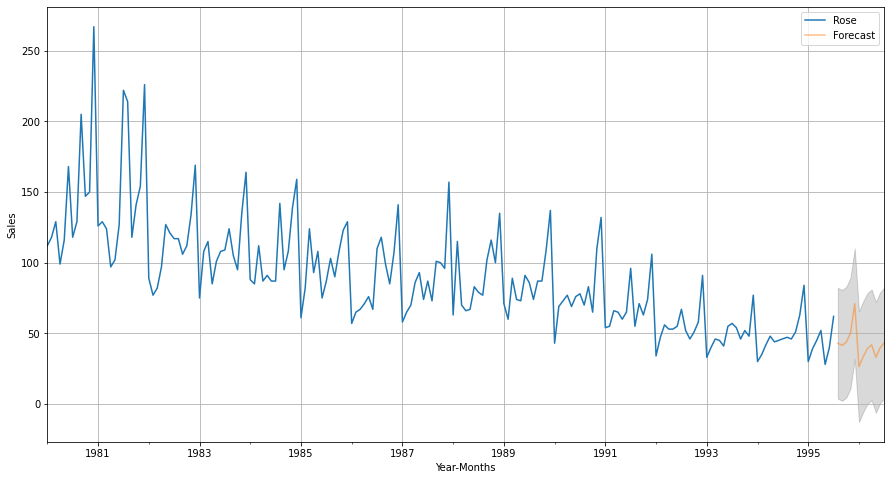

In [142]:
# plot the forecast along with the confidence band
axis = df.plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

**10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.**

In [143]:
prediction

1995-08-31    43.008486
1995-09-30    41.510778
1995-10-31    43.678998
1995-11-30    50.268219
1995-12-31    70.951800
1996-01-31    26.448111
1996-02-29    33.419382
1996-03-31    39.277688
1996-04-30    41.829250
1996-05-31    33.017518
1996-06-30    39.751866
1996-07-31    43.310090
Freq: M, dtype: float64

In [144]:
prediction.describe()

count    12.000000
mean     42.206016
std      10.956609
min      26.448111
25%      37.813111
50%      41.670014
75%      43.402317
max      70.951800
dtype: float64

*Sales of Rose Wine (1980 - 1995) were analysed. Hidden details are captured by doing EDA.*

*From 1981 sales decreasing throughout 1995.*

*Median : 85.*

*Highest Sale on 1980, whereas lowest sale on 1995.*

*It is evident from monthly plot that sales has been increased from August to December. Stock has to be more during these time frame. January recorded the lowest sale which is right after the month of December of previous years.*

*Trend and Seasonality are there in the dataset.*

*Dataset were split for training and test set. Various models such as Linear regression, Naïve bayes, Simple Exponential smoothing, Double exponential smoothing, Triple exponential smoothing, ARIMA and SARIMA built on training data and tested on test data.*

*Since the dataset has seasonality, SARIMA model would be best suited model. But from RMSE values of various models Triple exponential smoothing is best for the dataset. And same was applied on full data.*

*Sales for next 12 month is predicted with confidence interval. Sales are varying drastically across the month. Trend for Rose wine is decreasing drastically. it recommended to conduct the survey about the wine, accordingly action should be taken care.*

*Quality of Rose wine has to get increased to improve the sales.*
